# <font color = "000080">Redes neurais convolucionais: caso MNIST</font>

Utilizaremos o conjunto de dados **MNIST** para estudar as redes neurais convolucionais (*convnet* ou CNN).
O conjunto de dados possui 70.000 amostras de imagens rotuladas, sendo:    
- 60.000 -> treino
- 10.000 -> teste

Cada amostra está representada em um array `NumPy`, em escala de cinza com 28x28 pixels (784 atributos).

Cada pixel possui um valor de 0 a 255, representando sua intensidade.

Cada rótulo do conjunto **MNIST** é um valor inteiro, entre 0 e 9, indicando sua respectiva imagem.

Para cada imagem, o modelo da rede retornará, após o treinamento, um array contendo 10 probabilidades, indicando cada uma a possibilidade do dígito pertencer a uma determinada classe, 0 a 9. A classe com maior probabilidade indica o valor predito pela rede.

***
Requerimentos: `tensorflow`, `scikit-learn`, `matplotlib`, `seaborn`, `h5py`, `pydot` e `graphviz`.


Sugestão de instalação com anaconda:<br>
`conda create -n nome_do_ambiente tensorflow anaconda ipython jupyterlab scikit-learn matplotlib seaborn h5py pydot graphviz`

*`nome_do_ambiente`: ambiente a ser criado

In [ ]:
# caso não execute (MAC OS)
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

### <font color = "000080"> Rede neural utilizando Keras.</font>

Uma rede neural Keras consiste nos seguintes componentes:
- Uma **rede** (*network*) (também chamada de modelo ou *model*): uma sequência de camadas (*layers*) contendo os neurônios usados para aprender com as amostras. Os neurônios de cada camada recebem entradas, processam-nas (por meio de uma função de ativação) e produzem saídas. Os dados são alimentados na rede por meio de uma **camada de entrada** que especifica as dimensões dos dados da amostra. Isso é seguido por **camadas ocultas** de neurônios que implementam o aprendizado e uma **camada de saída** que produz as previsões. Quanto mais camadas você empilhar, mais profunda será a rede, daí o termo aprendizado profundo.
- Uma **função de perda** (*loss function*): produz uma medida de quão bem a rede prediz os valores objetivo (*target*). Valores de perda mais baixos indicam melhores previsões.
- Um **otimizador**: tenta minimizar os valores produzidos pela função de perda para ajustar a rede para fazer melhores previsões.

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Redes neurais convolucionais são comuns em aplicações de `visão computacional`, como reconhecimento de dígitos e caracteres manuscritos e reconhecimento de objetos em imagens e vídeo.

**2. _(Preencha)_** A classificação `múltipla` indica a probabilidade de uma amostra pertencer a cada uma das classes que o modelo prevê.

**3. _(F)_** Um otimizador produz uma medida de quão bem a rede prevê os valores objetivo.

1. visão computacional
2. múltipla
3. F

## <font color = "000080"> 1. Carregando o conjunto de dados.</font>

Vamos importar o módulo `tensorflow.keras.datasets.mnist` para que possamos carregar o conjunto de dados:

In [ ]:
# carregar o conjunto de dados MNIST
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from keras.datasets import mnist

11490434/11490434 [==============================] - 1s 0us/step


Utilizando a função `load_data()`. 
Carrega o conjunto de dados e retorna duas tuplas com dois elementos cada, contendo os dados de treinamento e de teste.

In [ ]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Por padrão, Keras usa `TensorFlow` como back-end para executar modelos de aprendizado profundo.

Resposta: TensorFlow

## <font color = "000080"> 2. Explorando o conjunto de dados.</font>

Vamos conhecer os dados antes de trabalhar com eles. Primeiro, verificamos as dimensões das imagens do conjunto de treinamento (X_treino), rótulos do conjunto de treinamento (y_treino), imagens do conjunto de teste (X_teste) e rótulos do conjunto de teste (y_teste):

In [ ]:
X_treino.shape

(60000, 28, 28)

In [ ]:
y_treino.shape

(60000,)

In [ ]:
X_teste.shape

(10000, 28, 28)

In [ ]:
y_teste.shape

(10000,)

<font color = "000080">Vamos visualizar algumas imagens.</font>

Utilize `%matplotlib inline` para exibir gráficos no *notebook*.

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
sns.set(font_scale=2)

Vamos usar a função `choice` para capturar aleatoriamente 24 imagens.<br>
A função retorna um *array* com os valores selecionados e os armazena em `indice`.<br>
Observe os números nas imagens e como alguns são difíceis de diferenciar.

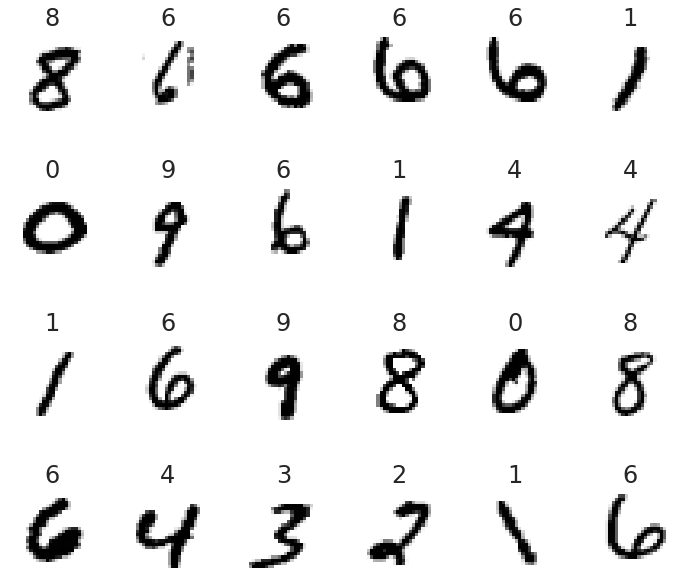

In [ ]:
# Importar biblioteca numpy
import numpy as np
# Utilizar a função choice
indice = np.random.choice(np.arange(len(X_treino)), 24, replace=False)
# Utilizar a função adequada para plotar os gráficos
figura, eixos = plt.subplots(nrows=4, ncols=6, figsize=(10, 9))

for item in zip(eixos.ravel(), X_treino[indice], y_treino[indice]):
    eixos, imagem, saida = item
    eixos.imshow(imagem, cmap=plt.cm.gray_r)
    eixos.set_xticks([])  # remove marcações do eixo x
    eixos.set_yticks([])  # remove marcações do eixo y
    eixos.set_title(saida)
plt.tight_layout()

Se você executar o código anterior várias vezes, poderá ver dígitos adicionais selecionados aleatoriamente. Você provavelmente descobrirá que, se não fosse pelos rótulos exibidos acima de cada dígito, seria difícil para você identificar alguns dos dígitos. Em breve veremos com que precisão nosso primeiro modelo `convnet` irá prever os dígitos no conjunto de teste `MNIST`.

## <font color = "000080">3. Preparando os dados.</font>

Redes convolucionais usando `Keras` requerem *arrays* `NumPy`no formato: (largura, altura, canais).<br>Cada imagem no conjunto **MNIST** possui 28 pixels e cada pixel possui um canal em escala de cinza (0 a 255).<br> Assim, cada amostra deve seguir o formato: (28, 28, 1).<br>Usando `reshape`conseguimos colocar no formato adequado.

Imagens em cores com valores RGB (vermelho, verde, azul) para cada pixel, teriam três canais: um canal para cada componente vermelho, verde e azul de uma cor.
<br>Conforme a rede neural aprende com as imagens, ela cria muitos mais canais. Em vez de tonalidade ou cor, os canais aprendidos representarão recursos mais complexos, como bordas, curvas e linhas, que eventualmente permitirão que a rede reconheça dígitos com base nesses recursos adicionais e como eles são combinados.
<br>Vamos reformular as 60.000 imagens do conjunto de treinamento e 10.000 de teste para as dimensões corretas para uso em nosso modelo `convnet` e confirmar suas novas formas. Lembre-se de que o método de reformulação da matriz NumPy recebe uma tupla que representa a nova forma da matriz.

In [ ]:
# O método de reformulação do array NumPy recebe uma tupla
# que representa a nova forma da matriz
X_treino = X_treino.reshape((60000, 28, 28, 1)) 

In [ ]:
X_treino.shape

(60000, 28, 28, 1)

In [ ]:
X_teste = X_teste.reshape((10000, 28, 28, 1))

In [ ]:
X_teste.shape

(10000, 28, 28, 1)

### <font color = "000080">Normalizando os dados no intervalo 0.0 a 1.0.</font>

Os atributos numéricos em amostras de dados podem ter intervalos de valores que variam amplamente. As redes de aprendizagem profunda têm melhor desempenho em dados que são dimensionados na faixa de 0,0 a 1,0 ou em uma faixa para a qual a média dos dados é 0,0 e seu desvio padrão é 1,0. Essa transformação nos dados é conhecida como **normalização**.


Cada pixel no conjunto de dados `MNIST` é um inteiro no intervalo 0-255. O método `astype`de `NumPy` converte os inteiros em pontos flutuantes de 32 bits. Agora é só dividir por 255 para a normalização dos dados no intervalo 0,0 a 1,0.

In [ ]:
X_treino = X_treino.astype('float32') / 255

In [ ]:
X_teste = X_teste.astype('float32') / 255

### <font color = "000080">Codificação one-hot</font>

A predição do modelo será um *array* com dez elementos indicando a possibilidade de um dígito pertencer a uma classe (0 a 9).<br>Como os rótulos para os dígitos são inteiros no intervalo 0-9, precisamos convertê-los para o modo apropriado de trabalho, neste caso, em dados categóricos (*one-hot encoding*).<br>Nosso modelo compara a predição com os rótulos. Assim, convertemos os dados nos vetores em um vetor com 1.0 no índice associado ao número e zero nos demais.<br>
Por exemplo: `[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]` representa `4`.<br>

O módulo `tensorflow.keras.utils` provê a função `to_categorical` para essa codificação.<br>Essa função conta o número de categorias únicas para cada item e codifica com 1 na posição correta e zero nas demais. Veja a saída em `y_treino[0]`, por exemplo.

In [ ]:
from tensorflow.keras.utils import to_categorical

Vamos transformar y_treino de um array unidimensional contendo os valores 0-9 em array bidimensional de dados categóricos.

In [ ]:
y_treino = to_categorical(y_treino)

In [ ]:
y_treino.shape

(60000, 10)

O código abaixo produz os dados categóricos de uma amostra para o dígito 5 (lembre-se de que NumPy mostra o ponto decimal, mas não zeros à direita em valores de ponto flutuante):

In [ ]:
y_treino[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Vamos transformar y_teste de um array unidimensional contendo os valores 0-9 em array bidimensional de dados categóricos.

In [ ]:
y_teste = to_categorical(y_teste)

In [ ]:
y_teste.shape

(10000, 10)

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** As redes de aprendizagem profunda têm melhor desempenho em dados que são dimensionados na faixa de 0,0 a 1,0 ou em uma faixa para a qual a média dos dados é 0,0 e seu desvio padrão é 1,0. Colocar seus dados em uma dessas formas é conhecido como `______`.

**2. _(Explique o código)_** Supondo que y_treino contenha rótulos de inteiros de 0 a 9 para os dados de treinamento do conjunto de dados MNIST, o que a instrução a seguir faz?


```
y_treino = to_categorical(y_treino)
```



Respostas: 1 - 
2 -  

1.   normalização;
2.   Esta instrução codifica os dados em y_treino, convertendo cada elemento de um rótulo de número inteiro individual no intervalo 0-9 para um array de 1.0s e 0.0s em que apenas o elemento que representa o rótulo do dígito é 1.0 e o resto são 0.0s.

## <font color = "000080">4. Criando a rede.</font>

Com os dados preparados, é hora de criar a rede neural convolucional!<br> Começaremos com o módulo `tensorflow.keras.models` e seu modelo `Sequential`.

In [ ]:
# importar Sequential
from tensorflow.keras.models import Sequential

Assim, criaremos uma rede *feed-forward* a qual sua saída (em uma camada) é entrada para outra camada.

In [ ]:
cnn = Sequential()

### <font color = "000080">Adicionando camadas.</font>

Uma rede neural convolucional típica consiste em várias camadas: uma camada de entrada que recebe as amostras de treinamento, camadas ocultas que aprendem com as amostras e uma camada de saída que produz as probabilidades de previsão. Vamos criar uma rede convnet básica aqui.

In [ ]:
# Vamos importar do módulo tensorflow.keras.layers
# as classes de camada que usaremos neste exemplo
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

### <font color = "000080">Convolução.</font>

Começamos a rede com a camada convolucional. Essa camada utiliza as relações entre pixels próximos para aprender padrões (ou atributos) em pequenas áreas de cada amostra, que servirão de entrada para as próximas camadas.<br>Essas pequenas áreas são chamadas de `kernels` ou `patches`.

### <font color = "000080">Passo 1...</font>

Vamos começar nossa rede com uma camada de convolução, que usa as relações entre pixels que estão próximos um do outro para aprender atributos úteis (ou padrões) em pequenas áreas de cada amostra. Esses atributos se tornam entradas para as camadas subsequentes.
As pequenas áreas com as quais a convolução aprende são chamadas de *kernels* ou *patches*. Vamos examinar a convolução em uma imagem de 6 por 6. Considere o diagrama a seguir, no qual o quadrado sombreado 3 por 3 representa o kernel; os números são simplesmente números de posição que mostram a ordem em que os *kernels* são visitados e processados.

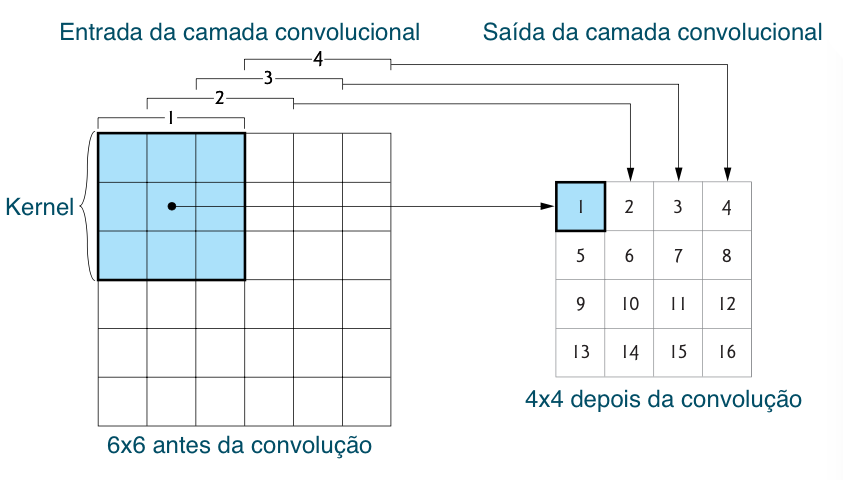

### <font color = "000080">Passo 2...</font>

Você pode pensar no *kernel* como uma “janela deslizante” em que a camada de convolução move um pixel de cada vez da esquerda para a direita na imagem. Quando o *kernel* atinge a borda direita, a camada de convolução move o *kernel* um pixel para baixo e repete esse processo da esquerda para a direita. *Kernel* normalmente são 3 por 3, embora tenhamos encontrado modelos convnets que usavam 5 por 5 e 7 por 7 para imagens de alta resolução. O tamanho do *kernel* é um hiperparâmetro ajustável.


Inicialmente, o *kernel* está no canto superior esquerdo da imagem original: posição 1 do *kernel* (o quadrado sombreado) na camada de entrada acima. A camada de convolução realiza cálculos matemáticos usando esses nove atributos para "aprender" sobre eles e, em seguida, produz um novo atributo para a posição 1 na saída da camada. Ao observar atributos próximos uns dos outros, a rede começa a reconhecer atributos como arestas, linhas retas e curvas.

Em seguida, a camada de convolução move o *kernel* um pixel para a direita (conhecido como passada ou *stride*) para a posição 2 na camada de entrada. Esta nova posição se sobrepõe a duas das três colunas da posição anterior, de modo que a camada de convolução pode aprender com todos os atributos que se tocam. A camada aprende com os nove atributos na posição 2 do *kernel* e produz um novo atributo na posição 2 da saída, como na figura abaixo.

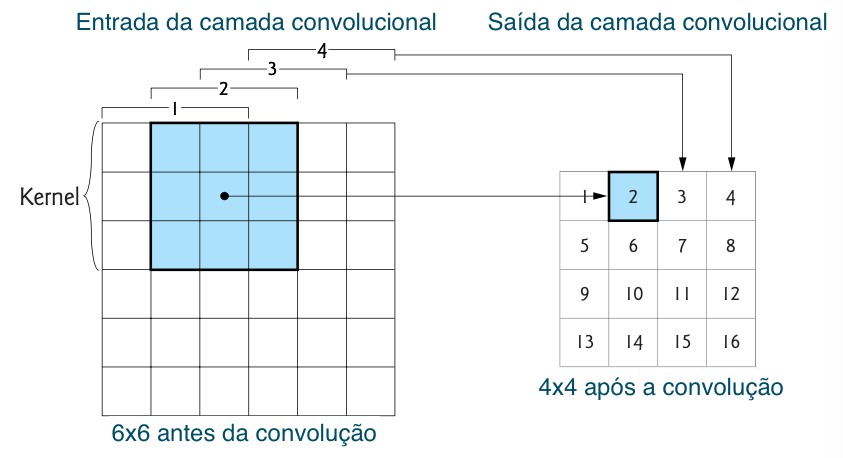

Para uma imagem 6 por 6 e um *kernel* 3 por 3, a camada de convolução faz isso mais duas vezes para produzir atributos para as posições 3 e 4 da saída da camada. Em seguida, a camada de convolução move o *kernel* um pixel para baixo e começa o processo da esquerda para a direita novamente para as próximas quatro posições do *kernel*, produzindo saídas nas posições 5–8, depois 9–12 e finalmente 13–16. A passagem completa de a imagem da esquerda para a direita e de cima para baixo é chamada de filtro. Para um *kernel* 3 por 3, as dimensões do filtro (4 por 4 em nosso exemplo acima) serão dois a menos do que as dimensões de entrada (6 por 6). Para cada imagem MNIST de 28 por 28, o filtro será de 26 por 26.

O número de filtros na camada convolucional é comumente 32 ou 64 ao processar pequenas imagens como as do MNIST, e cada filtro produz resultados diferentes. O número de filtros depende das dimensões da imagem: imagens de resolução mais alta têm mais atributos, portanto, exigem mais filtros. Se você estudar o código que a equipe Keras usou para produzir seus [modelos](https://github.com/keras-team/keras-applications/tree/master/keras_applications) convnets pré-treinados, você descobrirá que eles usaram 64, 128 ou até 256 filtros em suas primeiras camadas convolucionais. Com base em suas redes convnets e no fato de que as imagens MNIST são pequenas, usaremos 64 filtros em nossa primeira camada convolucional. O conjunto de filtros produzidos por uma camada de convolução é chamado de mapa de atributos (*feature map*).

As camadas de convolução subsequentes combinam atributos de mapas de atributos anteriores para reconhecer atributos maiores e assim por diante. Se estivéssemos fazendo reconhecimento facial, as camadas iniciais poderiam reconhecer linhas, bordas e curvas, e as camadas subsequentes poderiam começar a combiná-las em atributos maiores como olhos, sobrancelhas, narizes, orelhas e bocas. Uma vez que a rede aprende um atributo, por causa da convolução, ela pode reconhecer esse atributo em qualquer lugar da imagem. Este é um dos motivos pelos quais os modelos de redes convnets são usados para o reconhecimento de objetos em imagens.

Recapitulando:<br>
Os passos completos na imagem, da esquerda para a direita e de cima para baixo são chamados de **filtro** (*filter*).<br>Para um *kernel* 3x3, por exemplo, as dimensões do filtro serão duas vezes menor que a entrada (6x6).<br>Para cada imagem do nosso conjunto, 28x28, o filtro será 26x26.<br>
***
Aqui, as entradas serão 28x28x1 (784 atributos), pois são a primeira camada.<br>
Vamos especificar 64 filtros com tamanho do *kernel* 3x3 para a camada. Assim, a saída para cada imagem será 26x26x64 (43.264 atributos).

### <font color = "000080">Adicionando a camada de convolução.</font>

In [ ]:
# Adicionando uma camada de convolução Conv2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

A camada Conv2D é configurada com os seguintes argumentos:
- filters = 64: o número de filtros no mapa de atributos resultante.
- kernel_size = (3, 3): o tamanho do *kernel* usado em cada filtro.
- activation = 'relu': a função de ativação `relu` (unidade linear retificada ou *rectified linear unit*) é usada para produzir a saída desta camada. `relu` é a função de ativação mais amplamente usada nas redes de aprendizagem profunda de hoje e é boa para o desempenho porque é fácil de calcular. É comumente recomendada para camadas convolucionais.

Como esta é a primeira camada no modelo, também passamos o argumento input_shape = (28,28,1) para especificar a forma de cada amostra. Isso cria automaticamente uma camada de entrada para carregar as amostras e passá-las para a camada Conv2D, que é na verdade a primeira camada oculta. No Keras, cada camada subsequente infere seu input_shape do formato de saída da camada anterior, facilitando o empilhamento de camadas.

### <font color = "000080">Dimensionalidade da saída da primeira camada de convolução.</font>
Na camada convolucional anterior, as amostras de entrada são 28 por 28 por 1, ou seja, 784 atributos cada. Especificamos 64 filtros e um tamanho de *kernel* de 3 por 3 para a camada, então a saída de cada imagem é 26 por 26 por 64 para um total de 43.264 atributos no mapa de atributos: um aumento significativo em dimensionalidade e um número enorme em comparação com o número de atributos que processamos nos modelos das aulas anteriores. À medida que cada camada adiciona mais atributos, a dimensionalidade dos mapas de atributos resultantes torna-se significativamente maior. Essa é uma das razões pelas quais os estudos de aprendizado profundo geralmente requerem um maior poder de processamento.

Lembre-se que o *overfitting* (sobreajuste) pode ocorrer quando seu modelo é muito complexo em comparação com o que está modelando. No caso mais extremo, um modelo memoriza seus dados de treinamento. Quando você faz previsões com um modelo de sobreajuste, elas serão precisas se os novos dados corresponderem aos dados de treinamento, mas o modelo pode ter um desempenho insatisfatório com dados que nunca viu.

O *overfitting* tende a ocorrer no aprendizado profundo à medida que a dimensionalidade das camadas se torna muito grande. Isso faz com que a rede aprenda atributos específicos das imagens do conjunto de treinamento, em vez de aprender os atributos gerais das imagens. Algumas técnicas para prevenir *overfitting* incluem treinamento para menos épocas, aumento de dados, eliminação de atributos e regularização L1 ou L2.

A dimensionalidade mais alta também aumenta (e às vezes explode) o tempo de computação. Se você estiver realizando o aprendizado profundo em CPUs, em vez de GPUs ou TPUs, o treinamento pode se tornar insuportavelmente lento.

### <font color = "000080">Adicionando a camada de *pooling*.</font>

Para reduzir o *overfitting* e tempo de processamento, uma ou mais camadas para reduzir a dimensionalidade da camada de saída são acrescentadas na camada convolucional.

Uma camada de *pooling* (agrupamento) comprime (ou faz *down-samples*) dos resultados descartando atributos, o que ajuda a tornar o modelo mais geral. A técnica de *pooling* mais comum é chamada agrupamento máximo (*max pooling*), que examina um quadrado de 2 por 2 de atributos e mantém apenas o atributo máximo. Para entender o *pooling*, vamos supor mais uma vez um conjunto de atributos de 6 por 6. No diagrama a seguir, os valores numéricos no quadrado de 6 por 6 representam os atributos que desejamos compactar e o quadrado azul de 2 por 2 na posição 1 representa o conjunto inicial de atributos a examinar.

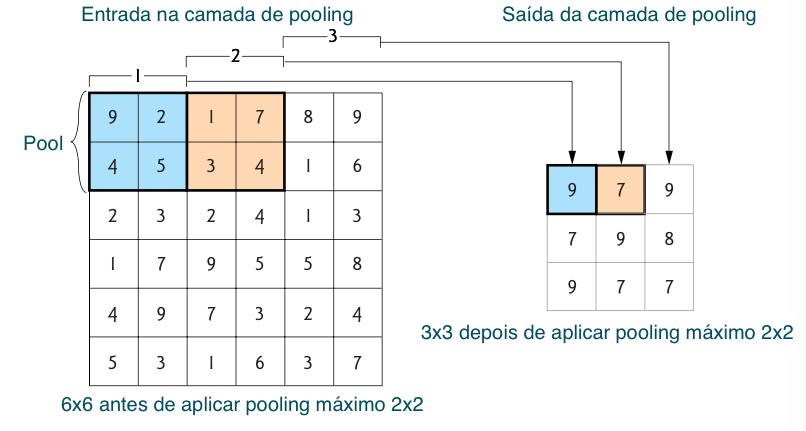

A camada de *pooling* máximo primeiro olha para o *pool* na posição 1 acima, em seguida, produz o atributo máximo desse *pool*: 9 em nosso diagrama. Ao contrário da convolução, não há sobreposição entre os *pools*. O *pool* se move de acordo com sua largura: para um *pool* de 2 por 2, a passada é 2. Para o segundo *pool*, representado pelo quadrado laranja de 2 por 2, a camada produz 7. Para o terceiro *pool*, a camada produz 9. Quando o *pool* atinge a borda direita, a camada de *pool* move o *pool* para baixo por sua altura - 2 fileiras - e continua da esquerda para a direita. Como cada grupo de quatro atributos é reduzido a um, o *pool* 2 por 2 compacta o número de atributos em 75%.

Vamos reduzir a saída de 26x26x64 para 13x13x64 adicionando MaxPooling2D:

In [ ]:
# Adicionando uma camada MaxPooling2D ao nosso modelo
cnn.add(MaxPooling2D(pool_size=(2, 2)))

Isso reduz a saída da camada anterior de 26 por 26 por 64 para 13 por 13 por 64. Nos exercícios, pediremos que você pesquise e use as camadas Dropout, que fornecem outra técnica para reduzir o *overfitting*.
Embora o *pooling* seja uma técnica comum para reduzir o *overfitting*, algumas [pesquisas](https://arxiv.org/abs/1412.6806) sugerem que camadas convolucionais adicionais que usam *strides* (passadas) maiores para seus núcleos podem reduzir a dimensionalidade e o *overfitting* sem descartar os atributos.

### <font color = "000080">Adicionando outra camada convolucional e de *pooling*.</font>

Convnets geralmente têm muitas camadas de convolução e *pooling*. As convnets da equipe Keras tendem a dobrar o número de filtros nas camadas convolucionais subsequentes para permitir que o modelo aprenda mais relações entre os atributos.
Vamos adicionar uma segunda camada de convolução com 128 filtros, seguida por uma segunda camada de *pooling* para mais uma vez reduzir a dimensionalidade em 75%.

In [ ]:
# Adicionamos uma segunda camada com 128 filtros
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

A entrada para a segunda camada convolucional é 13x13x64 (saída da primeira camada de *pooling*). A saída acima será 11x11x128. Para dimensões ímpares, as camadas de *pooling* no `Keras` são arrendodadas para baixo, por padrão (10x10 no caso). Assim, a camada de *pooling* terá na saída a estrutura 5x5x128.

In [ ]:
# Adicionamos uma camada de pooling 
cnn.add(MaxPooling2D(pool_size=(2, 2)))

### <font color = "000080">"Achatando" os resultados.</font>

Neste ponto, a saída da camada anterior é tridimensional (5 por 5 por 128), mas a saída final do nosso modelo será um array unidimensional de 10 probabilidades que classificam os dígitos. Para se preparar para as previsões finais unidimensionais, primeiro precisamos achatar a saída tridimensional da camada anterior. Uma camada Keras Flatten remodela sua entrada para uma dimensão. Neste caso, a saída da camada Flatten será 1 por 3200 (ou seja, 5 * 5 * 128).

Com a saída tridimensional acima (5x5x128), temos de redimensionar a entrada para a próxima camada, pois a saída final do nosso modelo será um *array* unidimensional contendo dez probabilidades de classificação de dígitos.<br>Vamos usar uma camada `Flatten` para redimensionar a entrada para 1x3200 (5\*5\*128):

In [ ]:
cnn.add(Flatten())

As camadas anteriores à camada `Flatten` aprenderam os atributos dos dígitos. Agora precisamos pegar todos esses atributos e aprender os relacionamentos entre eles, para que nosso modelo possa classificar qual dígito cada imagem representa. Aprender as relações entre os atributos e executar a classificação é realizado com camadas tipo `Dense` totalmente conectadas. A seguinte camada `Dense` cria 128 neurônios (unidades) que aprendem com as 3200 saídas da camada anterior:

In [ ]:
cnn.add(Dense(units=128, activation='relu'))

Muitos modelos convnets contêm pelo menos uma camada Dense como a acima. Convnets voltados para conjuntos de dados de imagem mais complexos com imagens de alta resolução como ImageNet - um conjunto de dados de mais de 14 milhões de imagens - geralmente têm várias camadas tipo Dense, geralmente com 4096 neurônios. Você pode ver essas configurações em várias convnets ImageNet pré-treinadas de Keras em sua documentação.

### <font color = "000080">Adicionando outra camada tipo Dense para produzir o resultado final.</font>

Nossa camada final é uma camada `Dense` que classifica as entradas em neurônios que representam as classes de 0 a 9. A função de ativação do `softmax` converte os valores desses 10 neurônios restantes em probabilidades de classificação. O neurônio que produz a maior probabilidade representa a previsão para uma determinada imagem de dígito:

In [ ]:
cnn.add(Dense(units=10, activation='softmax'))

### <font color = "000080">Apresentando o modelo.</font>

Vejamos o resumo da rede. Algumas questões interessantes a observar são os formatos de saída das várias camadas e o número de parâmetros. Os parâmetros são os **pesos** que a rede aprende durante o treinamento.<br>
Em `Output Shape`, `None` significa simplesmente que o modelo não conhece antecipadamente quantas amostras de treinamento você fornecerá - isso é conhecido apenas quando você inicia o treinamento.<br>
<br>Além disso, observe que não há parâmetros "não treináveis". `Keras` treina **todos os parâmetros** por padrão, mas é possível impedir o treinamento para camadas específicas, o que normalmente é feito quando você está ajustando suas redes ou usando os parâmetros aprendidos de outro modelo em um novo modelo (processo conhecido como *transfer learning*).

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 5, 5, 128)         16512     
                                                                 
 flatten (Flatten)           (None, 3200)              0

Esta é uma rede relativamente pequena, mas precisará aprender quase 500.000 parâmetros! E isso é para imagens minúsculas que têm menos de um quarto da resolução dos ícones na maioria das telas iniciais dos telefones móveis atuais. Imagine quantos recursos uma rede teria que aprender para processar quadros de vídeo 4K de alta resolução ou as imagens de altíssima resolução produzidas pelas câmeras digitais de hoje.

### <font color = "000080">Visualizando o modelo.</font>

Você pode visualizar o modelo usando a função `plot_model` do módulo `tensorflow.keras.utils`.

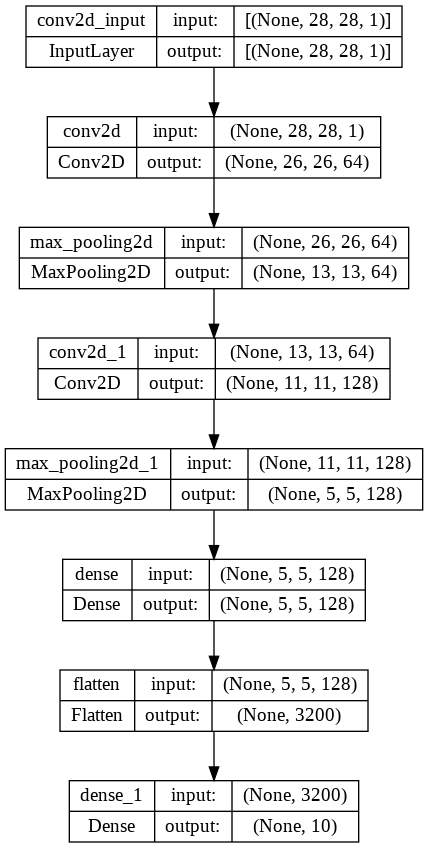

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

Depois de armazenar a visualização em `convnet.png`, usamos a classe `Image` do módulo `IPython.display` para mostrar a imagem no *notebook*. ``Keras`` atribui os nomes das camadas na imagem.

### <font color = "000080">Compilando o modelo.</font>

Agora falta completar o modelo da rede chamando o método `compile`.<br>
Utilizaremos a otimização `adam`, que é um método de descida de gradiente estocástico, baseado na estimativa adaptativa de momentos de primeira e segunda ordem.<br>
Para o cálculo da taxa de erro, usaremos `categorical_crossentropy` que calcula a perda de entropia cruzada entre os rótulos e as previsões.<br>
Em `metrics`, usamos `accuracy` que simplesmente calcula com que frequência as previsões são iguais aos rótulos.

In [43]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Os argumentos são:
- optimizer = 'adam': o otimizador que este modelo usará para ajustar os pesos em toda a rede neural à medida que aprende. Existem muitos [otimizadores](https://keras.io/optimizers/) - 'adam' tem um bom desempenho em uma ampla variedade de modelos;
- loss = 'categorical_crossentropy': esta é a função de perda usada pelo otimizador em redes de multiclassificação como a nossa convnet, que prevê 10 classes. Conforme a rede neural aprende, o otimizador tenta minimizar os valores retornados pela função de perda. Quanto menor a perda, melhor será a rede neural em prever o que cada imagem é. Para classificação binária, Keras fornece 'binary_crossentropy', e para regressão, 'mean_squared_error'. Para outras funções de perda, consulte a [documentação](https://keras.io/losses/).
- metrics = ['accuracy']: esta é uma lista das métricas que a rede irá produzir para ajudá-lo a avaliar o modelo. A precisão (*accuracy*) é uma métrica comumente usada em modelos de classificação. Neste exemplo, usaremos a métrica de precisão para verificar a porcentagem de previsões corretas. Para obter uma lista de outras métricas, consulte sua [documentação](https://keras.io/metrics/).

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Uma rede ` neural` passa a saída de uma camada como a entrada para a próxima camada na sequência.
Resposta: 

**2. _(Preencha)_** Uma camada `convolucional` usa as relações entre pixels que estão próximos um do outro para aprender atributos úteis (ou padrões), como bordas, linhas retas e curvas.
Resposta:

**3. _(Preencha)_** Um problema chamado `overfitting` tende a ocorrer no aprendizado profundo à medida que a dimensionalidade das camadas se torna muito grande.
Resposta:

**4. _(F)_** No Keras, você deve especificar a forma de entrada para cada nova camada adicionada ao seu modelo de rede neural.
Resposta:

**5. _(F)_** Em um modelo convnet, aprender as relações entre atributos e realizar a classificação é conseguido com as camadas de convolução.
Resposta:

**6. _(Preencha)_** A função de ativação `softmax` converte as saídas dos neurônios em probabilidades de classificação para classificação múltipla.
Resposta:

**7. _(Explique o código)_** Supondo que cnn seja um modelo de rede neural convolucional de Keras, o que a declaração a seguir faz?

```
cnn.add(MaxPooling2D(pool_size=(2, 2)))
```

Resposta: O comando acima adiciona uma camada de pooling ao modelo, reduzindo a saída da camada anterior pela metade: a/2 por a/2 por b.

**8. _(Explique o código)_** Supondo que cnn seja uma rede neural convolucional de Keras modelo, o que a seguinte declaração faz?


```
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
```

Resposta: Compila o modelo de rede através do método compile, setando os parametros optimizer, loss e metrics. A otimização (optimizer) 'adam' é um método de descida de gradiente estocástico, baseado na estimativa adaptativa de momentos de primeira e segunda ordem. Para o cálculo da taxa de erro (loss), o categorical_crossentropy calcula a perda de entropia cruzada entre os rótulos e as previsões. E em metrics, accuracy calcula com que frequência as previsões são iguais aos rótulos.

## <font color = "000080">5. Treinando o modelo.</font>

Após decidirmos a arquitetura do modelo (número de camadas ocultas, funções de ativação etc), a fase de compilação, agora vamos a próxima fase: treinamento.<br>
O método `fit` recebe nos dois primeiros argumentos o conjunto de treinamento e o objetivo (*target*).<br>
`epochs` indica o número de épocas de treinamento.<br>
`batch_size` indica o número de amostras para processar a cada época. Geralmente potências de 2, desde 32 a 512.<br>
`validation_split` especifica que o nosso modelo deve reservar os últimos 10% (0,1) das amostras de treinamento para validação (nesse caso, 6000 amostras serão usadas para validação).<br><br>

Observação: Podemos ter dados de validação separados. Usamos o argumento `validation_data` para especificar uma tupla contendo *arrays* de amostras e rótulos de destino. Em geral, é melhor obter dados de validação selecionados aleatoriamente. Podemos usar a função `train_test_split` do `scikit-learn` para essa finalidade e passar os dados selecionados aleatoriamente para o argumento `validation_data`.

In [44]:
historico = cnn.fit(X_treino, y_treino, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 14s 7ms/step - loss: 0.1625 - accuracy: 0.9513 - val_loss: 0.0591 - val_accuracy: 0.9828
Epoch 2/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0469 - val_accuracy: 0.9860
Epoch 3/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 4/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0381 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0365 - val_accuracy: 0.9900


À medida que o treinamento prossegue, o método de ajuste `fit` gera informações que mostram o progresso de cada época, quanto tempo a época levou para ser executada (nesse caso, cada uma levou de 102 a 122 segundos) e as métricas de avaliação para essa passagem. Durante a última época deste modelo, a precisão atingiu 99,52% para as amostras de treinamento (`acc` ou `accuracy`) e 98,95% para as amostras de validação (`val_acc` ou `val_accuracy`).<br>
Excelentes números já que ainda não tentamos ajustar os hiperparâmetros ou ajustar o número e os tipos das camadas, o que pode levar a resultados ainda melhores (ou piores). Como o aprendizado de máquina, o aprendizado profundo é uma ciência empírica que
se beneficia de muita experimentação.

### <font color = "000080">Avaliando o modelo.</font>

Agora vamos verificar a precisão do modelo com dados que o modelo ainda não recebeu (novos dados). Para fazer isso, chamamos o método de avaliação do modelo `evaluate`, que mostra como saída quanto tempo levou para processar as amostras de teste.

In [45]:
erro, acuracia = cnn.evaluate(X_teste, y_teste)

313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9901


In [46]:
erro

0.03006151132285595

In [47]:
acuracia

0.9901000261306763

De acordo com a saída anterior, nosso modelo `convnet` é 99,0299% preciso ao prever os rótulos para dados novos (ainda que neste momento, não tentamos ajustar o modelo).<br>
Sugestão: experimente diferentes números e tipos de camadas, bem como seus parâmetros e observe como essas alterações afetam seus resultados.

In [48]:
# Capturar os rótulos do treinamento: 'loss', 'accuracy', 'val_loss' e 'val_accuracy'
# para plotar os gráficos de acurácia e perdas
hist_dicio = historico.history
hist_dicio.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
# plotar o gráfico de perdas de treinamento e validação
# epocas vs loss ; epocas vs val_loss
plt.clf()
acuracia = hist_dicio['accuracy']
acuracia_val = hist_dicio['val_accuracy']
perda = hist_dicio['loss']
perda_val = hist_dicio['val_loss']
epocas = range(1, len(acuracia) + 1)

# plotar aqui

<Figure size 432x288 with 0 Axes>

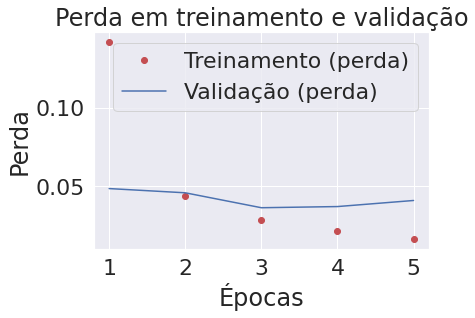

In [50]:
# plotar o gráfico de acurácia de treinamento e validação
# epocas vs accuracy ; epocas vs val_accuracy
plt.clf()

# plotar aqui

<Figure size 432x288 with 0 Axes>

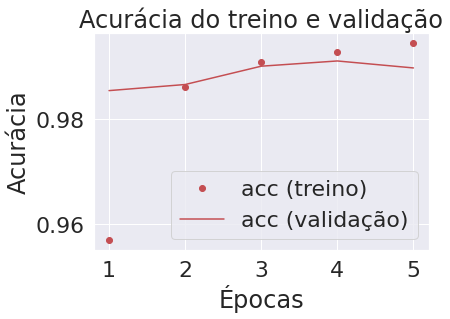

### <font color = "000080">Fazendo predições.</font>

Agora vamos prever as classes de dígitos. O método de previsão do modelo `predict` prevê as classes das imagens de dígitos em seu *array* de argumentos (`X_teste`):

In [51]:
predicoes = cnn.predict(X_teste)

313/313 [==============================] - 1s 3ms/step


Podemos verificar qual deve ser o primeiro dígito da amostra olhando para `y_teste[0]`:

In [52]:
y_teste[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

De acordo com a saída acima, a primeira amostra é o dígito 7, porque a representação categórica do rótulo da amostra de teste especifica o valor 1 no índice 7.<br><br>
Abaixo, verificamos as probabilidades:

In [53]:
for indice, probabilidade in enumerate(predicoes[500]):
    print(f'{indice}: {probabilidade:.10%}')

0: 0.0000000000%
1: 0.0000000001%
2: 0.0000000744%
3: 100.0000000000%
4: 0.0000000000%
5: 0.0000000053%
6: 0.0000000000%
7: 0.0000000347%
8: 0.0000000045%
9: 0.0000042469%


### <font color = "000080">Localizando as predições incorretas.</font>

Para determinar se a previsão estava correta, devemos comparar o índice de maior probabilidade nas previsões em `predicoes[0]` com o índice do elemento que contém valor 1 em `y_teste[0]` e assim por diante. Se esses valores de índice forem os mesmos, a previsão estava correta; caso contrário, estava incorreta.
<br>
A função `argmax` de `NumPy` determina o índice do elemento mais alto avaliado em seu argumento do *array*. Vamos usar isso para localizar as previsões incorretas. No código a seguir, `p` é o *array* de valores previstos e `e` é o *array* de valores esperados (os valores esperados são os rótulos das imagens de teste do conjunto de dados).

In [54]:
imagens = X_teste.reshape((10000, 28, 28))
predicoes_incorretas = []

for i, (p, e) in enumerate(zip(predicoes, y_teste)):
    predito, esperado = np.argmax(p), np.argmax(e)
    
    if predito != esperado:
        predicoes_incorretas.append((i, imagens[i], predito, esperado))

No código acima, primeiro remodelamos as amostras na forma de (28, 28, 1) que `Keras` requeriu no treinamento de volta a (28, 28), que o `Matplotlib` requer para exibir as imagens. Em seguida, preenchemos a lista `predicoes_incorretas` usando a instrução `for`. Usamos `zip` para compactar as linhas que representam cada amostra nos *arrays* `predicoes` e `y_teste` e, em seguida, enumeramo-as para que possamos capturar seus índices. Se os resultados de `argmax` para `p` e `e` forem diferentes, a previsão está incorreta; assim anexamos uma tupla ao *array* `predicoes_incorretas` que contêm o índice, a imagem, o valor previsto e o valor esperado dessa amostra.

### <font color = "000080">Visualizando as predições incorretas.</font>

Vejamos a quantidade de predições incorretas:

In [55]:
len(predicoes_incorretas)

99

O próximo código exibe 24 das imagens incorretas rotuladas com o índice de cada imagem, o valor previsto `p` e o valor esperado `e`. Observe os dígitos e a dificuldade de definir cada um (para máquina ou ser humano).

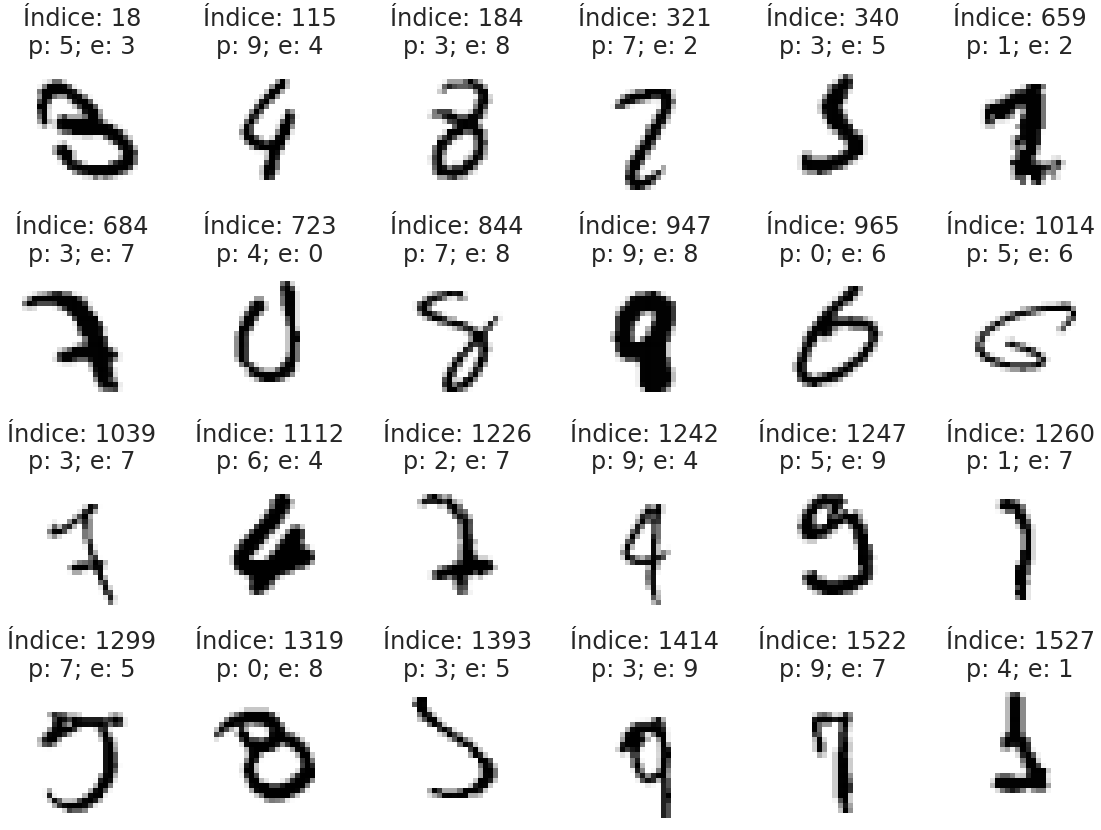

In [56]:
figura, eixos = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for eixos, item in zip(eixos.ravel(), predicoes_incorretas):
    indice, imagem, predito, esperado = item
    eixos.imshow(imagem, cmap=plt.cm.gray_r)
    eixos.set_xticks([])  # remove marcações no eixo x
    eixos.set_yticks([])  # remove marcações no eixo y
    eixos.set_title(f'Índice: {indice}\np: {predito}; e: {esperado}')
plt.tight_layout()

### <font color = "000080">Exibindo as probabilidades para várias previsões incorretas.</font>

Vamos verificar as probabilidades para algumas predições incorretas.

In [57]:
def exibe_probabilidades(predicao):
    for indice, probabilidade in enumerate(predicao):
        print(f'{indice}: {probabilidade:.10%}')

In [58]:
exibe_probabilidades(predicoes[340])

0: 0.0000018152%
1: 0.0044385011%
2: 0.0000086936%
3: 93.3493733406%
4: 0.0060105336%
5: 6.6322810948%
6: 0.0013712108%
7: 0.0000000037%
8: 0.0056010871%
9: 0.0009053889%


In [59]:
exibe_probabilidades(predicoes[659])

0: 0.0060948350%
1: 72.2679495811%
2: 13.3060395718%
3: 0.5695231725%
4: 0.0001907722%
5: 0.0000031049%
6: 0.0000000072%
7: 13.8298287988%
8: 0.0013242681%
9: 0.0190515813%


In [60]:
exibe_probabilidades(predicoes[1232])

0: 0.0367112312%
1: 0.0029842307%
2: 0.0010261062%
3: 0.0002261148%
4: 18.5947269201%
5: 0.0155869406%
6: 0.5938916933%
7: 0.0023501652%
8: 0.1671892707%
9: 80.5853068829%


In [61]:
exibe_probabilidades(predicoes[1459])

0: 0.0000000411%
1: 0.0002628378%
2: 61.0372304916%
3: 38.4675890207%
4: 0.0000042913%
5: 0.0000034207%
6: 0.0000000000%
7: 0.3679325804%
8: 0.1269594999%
9: 0.0000099956%


## <font color = "000080">Autoavaliação</font>

**1. _(F)_** O argumento validation_split do método de ajuste de um modelo Keras diz a ele para selecionar aleatoriamente uma porcentagem das amostras de treinamento para usar como dados de validação.

Resposta: F

**2. _(Preencha)_** O `Overfitting` tende a ocorrer no aprendizado profundo conforme a dimensionalidade das camadas se torna muito grande.

Resposta: Overfitting

### <font color = "000080">Salvando o modelo.</font>

Devido ao tempo de treinamento da rede e possibilidade de reutilização de seu resultado, podemos salvar o seu resultado (estado) e carregarmos posteriormente para mais predições e/ou novos problemas.<br>
Por exemplo, as camadas em nosso modelo já sabem reconhecer recursos como linhas e curvas, que podem ser úteis no reconhecimento de caracteres manuscritos (como no conjunto de dados EMNIST).<br>
Assim, você pode reutilizar o modelo existente e usá-lo como base para um modelo mais robusto. Esse processo é chamado de aprendizado por transferência pois você transfere o conhecimento de um modelo existente para um novo modelo.
<br>
O método `save` de `Keras` salva o modelo e armazena suas informações de arquitetura e estado em um formato chamado *Hierarchical Data Format* (HDF5). Esses arquivos usam a extensão de arquivo .h5 por padrão.

In [62]:
cnn.save('mnist_cnn.h5')

Agora, quando precisar, é só carregar o modelo com a função `load_model` de `tensorflow.keras.models`.

In [63]:
from tensorflow.keras.models import load_model
cnn_new = load_model('mnist_cnn.h5')

## <font color = "000080">Autoavaliação</font>

**1. _(Preencha)_** Você pode carregar um modelo salvo anteriormente e usá-lo como base para um modelo mais robusto. Este processo é denominado `aprendizado por transferência`: você transfere o conhecimento de um modelo existente para um novo modelo.

Resposta: Aprendizado por transferência

## <font color = "000080">Considerações finais.</font>

Estudamos o que são os tensores e por que eles são cruciais para o aprendizado profundo. <br>Discutimos o básico dos neurônios e redes neurais de várias camadas para a construção de modelos de aprendizado profundo de `Keras`. Consideramos alguns tipos populares de camadas e como utilizá-las.<br>
Introduzimos redes neurais convolucionais (*convnets*) e indicamos que elas são especialmente apropriadas para aplicativos de visão computacional. Em seguida, construímos, treinamos, validamos e testamos um modelo *convnet* usando o banco de dados MNIST de dígitos manuscritos para os quais atingimos 99,0599% de precisão de previsão. <br>Isso é notável, uma vez que conseguimos isso trabalhando com um modelo apenas básico e sem fazer nenhum ajuste de hiperparâmetro. Você pode experimentar modelos mais sofisticados e ajustar os hiperparâmetros para tentar obter melhor desempenho.

### <font color = "000080">Referências</font>

DEITEL, P. e DEITEL, H., Intro to Python for computer science and data science. Pearson, 2020.

In [ ]:
# Adaptado de:
#
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################